In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.metrics import F1Score 
from keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import ImageFont
import visualkeras

# Data and Model

In [23]:
# Load the data
(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

In [24]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [25]:
# Create the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [26]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 23s 24ms/step - loss: 0.1778 - accuracy: 0.9434
Epoch 2/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 33s 36ms/step - loss: 0.0341 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0195 - accuracy: 0.9938


In [28]:
# Predict the test data
y_true = test_labels
y_pred = model.predict(test_images)

313/313 [==============================] - 5s 12ms/step


# Reporting

In [29]:
# Convert predicted values to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integer labels
y_true_int = np.argmax(y_true, axis=1)

# Calculate the classification report
report = classification_report(y_true_int, y_pred_classes, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9919    0.9959    0.9939       980
           1     0.9913    1.0000    0.9956      1135
           2     0.9932    0.9913    0.9922      1032
           3     0.9940    0.9871    0.9906      1010
           4     0.9909    0.9980    0.9944       982
           5     0.9932    0.9843    0.9887       892
           6     0.9927    0.9927    0.9927       958
           7     0.9826    0.9912    0.9869      1028
           8     0.9938    0.9897    0.9918       974
           9     0.9920    0.9832    0.9876      1009

    accuracy                         0.9915     10000
   macro avg     0.9916    0.9913    0.9914     10000
weighted avg     0.9915    0.9915    0.9915     10000



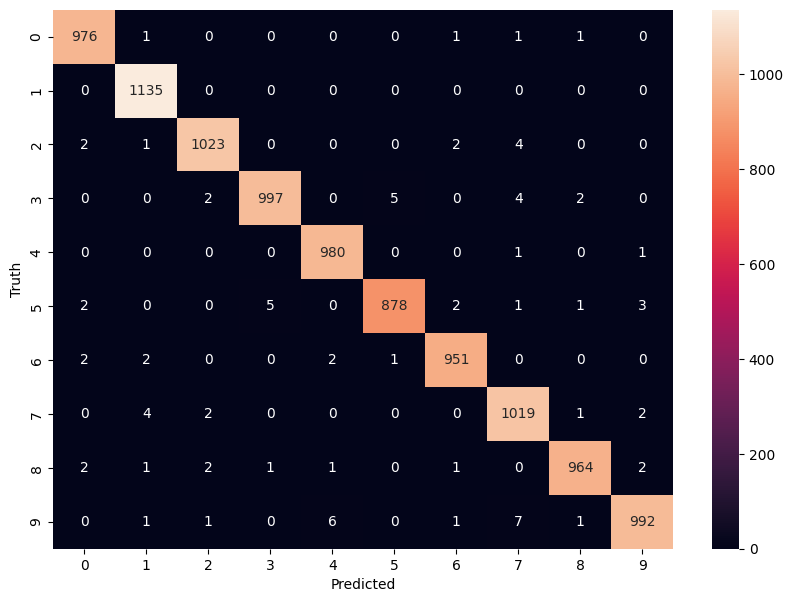

In [30]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_int, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [31]:
# Generate classification report as dictionary
report_dict = classification_report(y_true_int, y_pred_classes, digits=4, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame to an Excel file
filename = 'cnn_mnist_naiv'
report_df.to_excel(filename + '.xlsx', sheet_name=filename)

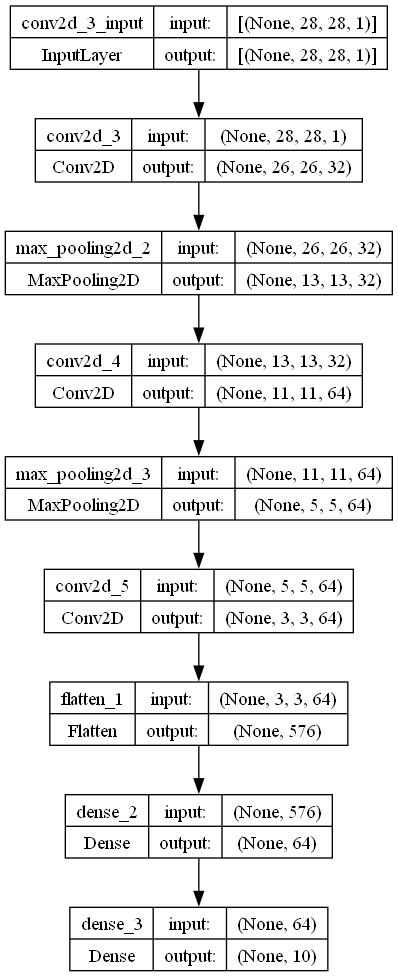

In [32]:
# Export model image with plot_model
plot_model(model, to_file=filename + '.png', show_shapes=True, show_layer_names=True)

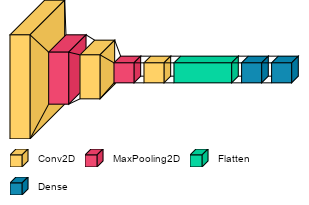

In [33]:
# Export model image with visualkeras
font = ImageFont.truetype("C:\\Windows\\Fonts\\Arial.ttf", 10)
visualkeras.layered_view(model, legend=True, font=font, to_file=filename + '.png')